In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# DATA EXPLORATION

In [4]:
# To get rid of these null values, I'm going to put an empty string in place of each null value in the description column.
df["description"] = df["description"].fillna(value="")

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,35349.00,35349.00,35349.00,35349.00,35349.00
mean,20.10,1902529.32,61493.63,3097.44,7066.05
std,7.52,5839415.14,181625.60,29569.72,30680.32
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,201980.00,4485.00,170.00,526.00
50%,24.00,561752.00,15163.00,531.00,1589.00
75%,25.00,1501028.00,45309.00,1602.00,4692.00
max,43.00,149376127.00,3749810.00,1674420.00,1361580.00


# DATA VISUALIZATION

In [6]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

In [7]:
# Adding a new variable to the dataset whose value is true.If the video title contains at least one upper word and 
#     false otherwise.
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

In [8]:
# Adding another column to our data set to analyze the length of titles of videos.
value_counts = df["contains_capitalized"].value_counts().to_dict()

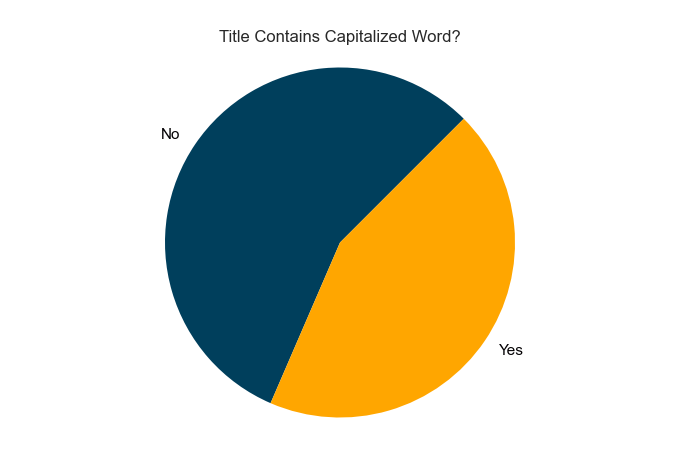

In [9]:
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [10]:
df["title_length"] = df["title"].apply(lambda x: len(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_12028\947655805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


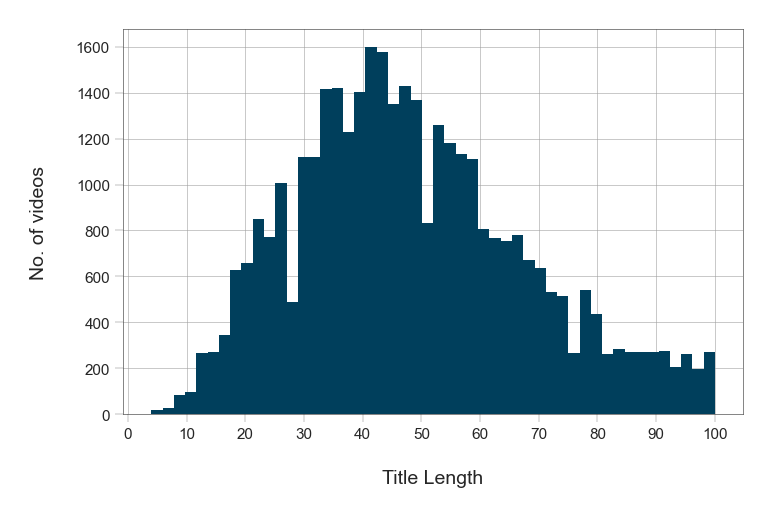

In [11]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))


# OBSERVATION : the video's title length distribution looks like a normal distribution, where most  videos have a title 
#                length of around 30 till 60 characters.

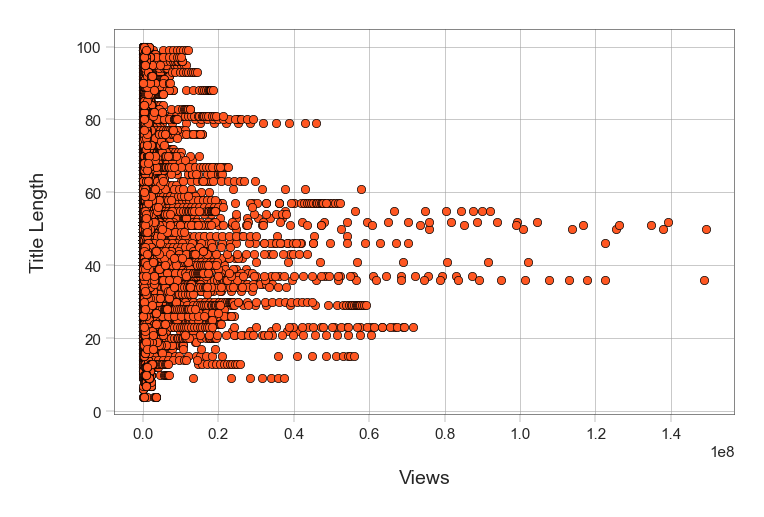

In [12]:
# a scatter plot to analyze the relationship between the title length and the number of views.
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

# CORRELATION 

In [13]:
# we would like to see how views and likes correlate, meaning that views and likes increase and decrease together.
# The correlation map and correlation table above indicate that a views and likes are strongly, positively correlated.

In [14]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]


C:\Users\HP\AppData\Local\Temp\ipykernel_12028\4287117546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


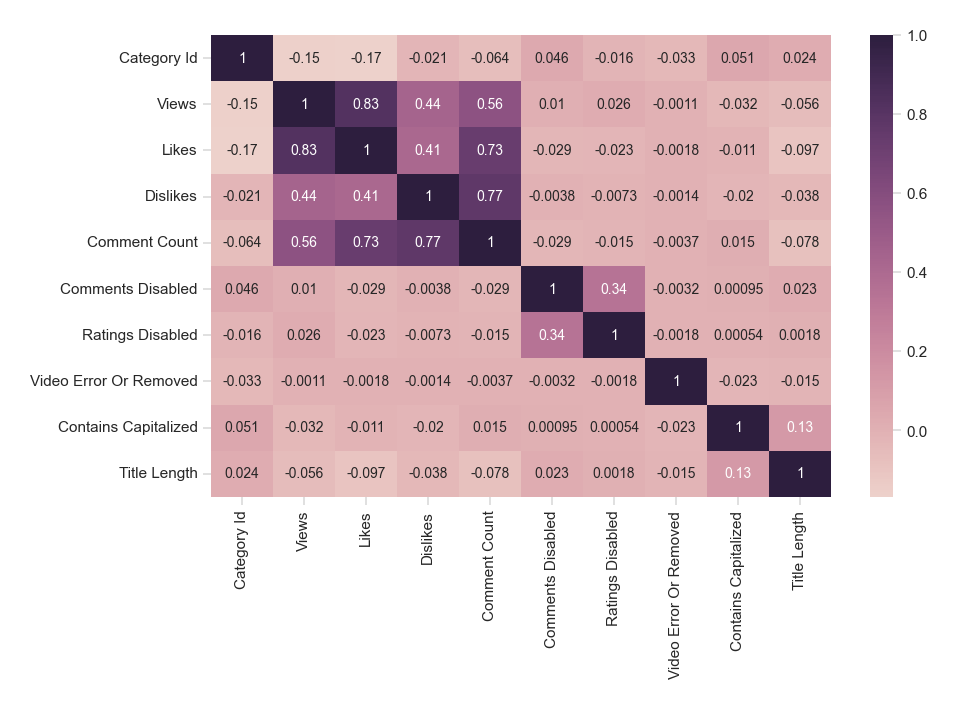

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [16]:
title_words = list(df["title"].apply(lambda x: x.split()))

In [17]:
title_words = [x for y in title_words for x in y]

In [18]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))

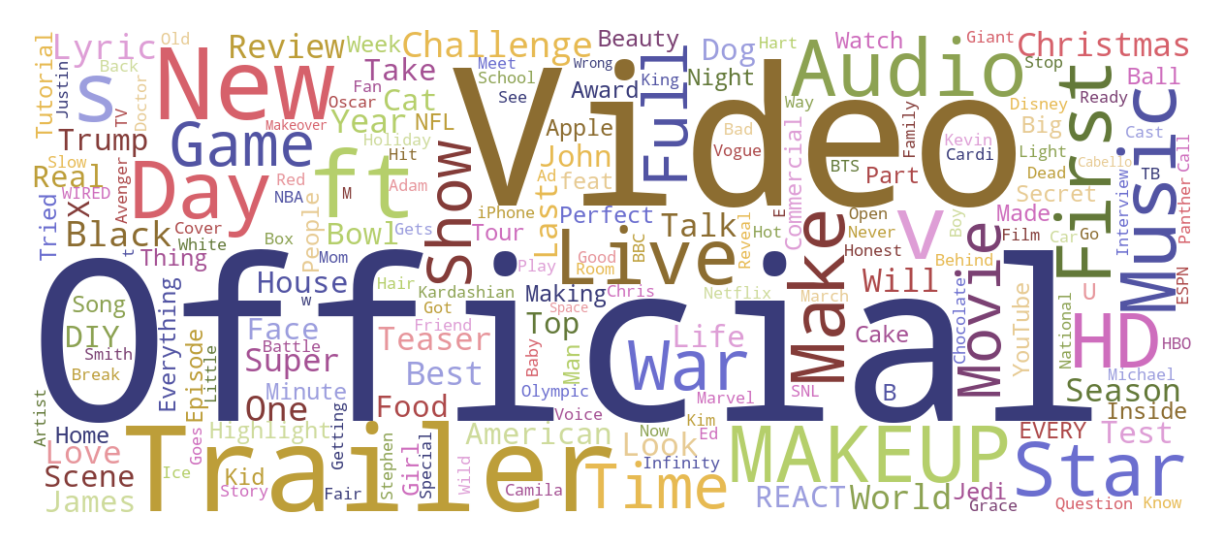

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")